## 🦇 Descripción biológica de *Zubat*

*Zubat* es un Pokémon de tipo **Veneno/Volador** inspirado en los murciélagos reales del género *Desmodus* y otros quirópteros insectívoros.  
Habita comúnmente en **cuevas, bosques húmedos y zonas oscuras**, donde forma grandes colonias que utilizan la **ecolocalización** para orientarse y cazar insectos durante la noche.  

Carece de ojos funcionales visibles, pero posee un sofisticado sistema de detección por ultrasonido, lo que le permite desplazarse y comunicarse en completa oscuridad.  
Su presencia suele asociarse a **ecosistemas saludables**, ya que los murciélagos (y por analogía, *Zubat*) desempeñan un papel ecológico fundamental en el **control de poblaciones de insectos** y la **dispersión de semillas**.

En este taller, usaremos un dataset ficticio de *Zubat* para **simular observaciones biológicas y ecológicas** sobre un entorno geográfico real (México), permitiendo explorar técnicas de **análisis SIG y visualización de biodiversidad** con Python.

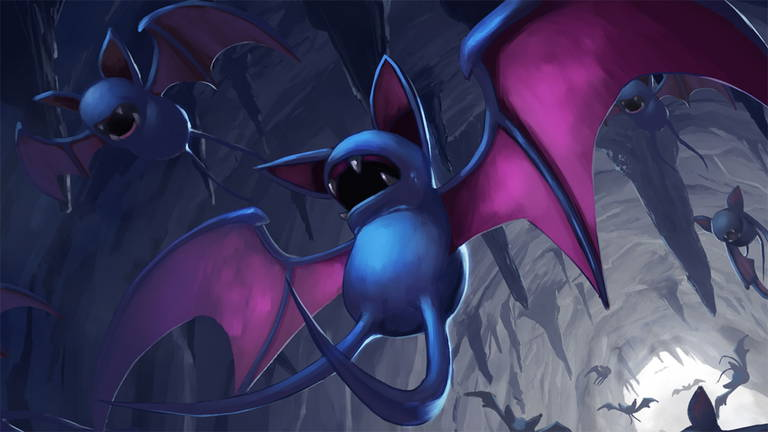

# 🧭 Bloque 9A – Visualización SIG Básica: Exploración Espacial y Primeras Visualizaciones 🗺️

## 🎯 Objetivo
Aprender a cargar, explorar y visualizar shapefiles en Python.  
Integraremos un dataset ficticio de observaciones de **Zubat 🦇** para entender cómo conectar bases CSV con datos geográficos.

## 🧰 Librerías
- geopandas
- pandas
- matplotlib
- seaborn
- zipfile / requests
- shapely


In [2]:
# 🧩 Importar librerías necesarias
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile, requests, io, os
from shapely.geometry import Point


## 🌐 1. Cargar el shapefile municipal desde archivo o desde URL

Podemos:
1. **Usar un shapefile local**, por ejemplo `/content/dest23gw_c.zip`.
2. **Descargar automáticamente** desde CONABIO:
   - URL: http://www.conabio.gob.mx/informacion/gis/maps/ccl/dest23gw_c.zip


In [38]:
# Definir ruta y carpeta
local_zip = "/content/dest23gw_c.zip"
extract_path = "/content/data/estados_conabio"
os.makedirs(extract_path, exist_ok=True)

# Si no existe el ZIP local, descargar desde URL
if not os.path.exists(local_zip):
    print("📥 Descargando shapefile desde CONABIO...")
    url = "http://www.conabio.gob.mx/informacion/gis/maps/ccl/dest23gw_c.zip"
    r = requests.get(url)
    open(local_zip, "wb").write(r.content)

# Descomprimir el shapefile
with zipfile.ZipFile(local_zip, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# Detectar archivo .shp
for file in os.listdir(extract_path):
    if file.endswith(".shp"):
        shp_path = os.path.join(extract_path, file)
        print(f"✅ Shapefile detectado: {shp_path}")

# Leer shapefile
estados = gpd.read_file(shp_path)
estados = estados.to_crs("EPSG:4326")
print("✅ Shapefile cargado correctamente.")


📥 Descargando shapefile desde CONABIO...
✅ Shapefile detectado: /content/data/estados_conabio/dest23cw.shp
✅ Shapefile cargado correctamente.


## 🗂️ 2. Explorar los atributos del shapefile (.dbf)


In [39]:
print("📋 Columnas disponibles en el shapefile:")
for col in estados.columns:
    print(f"- {col}")

print("\n🧭 Sistema de referencia de coordenadas (CRS):", estados.crs)
estados.head()


Output hidden; open in https://colab.research.google.com to view.

## 3. Carga de datos de CSV

In [40]:
armadillo = pd.read_csv("/content/db_Dasypus_novemcinctus.csv")
armadillo.head()

/tmp/ipython-input-1024972207.py:1: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  armadillo = pd.read_csv("/content/db_Dasypus_novemcinctus.csv")


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,998689741,0057a720-17c9-4658-971e-9578f3577cf5,FT:RUTM:0003,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,Carlos Alberto Hernández Medina,2013-09-12T00:00:00,CC_BY_NC_4_0,Fundacion Tropico,Carlos Alberto Hernández Medina,NaN,NaN,2025-10-08T06:00:10.753Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...
1,986148719,71e82020-f762-11e1-a439-00145eb45e9a,urn:catalog:OMNH:OCGR:11993,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,NaN,CC0_1_0,NaN,"Grogan, ME, Waits, JL",NaN,NaN,2025-10-07T23:08:00.156Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...
2,923924578,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/759335,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,Chris Hyde,2014-06-29T18:15:51,CC_BY_NC_4_0,Chris Hyde,Chris Hyde,NaN,NaN,2025-10-14T18:12:33.802Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
3,923924015,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/757410,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,Chris Hyde,2014-06-28T06:30:10,CC_BY_NC_4_0,Chris Hyde,Chris Hyde,NaN,NaN,2025-10-14T18:12:35.051Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
4,923916591,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/739294,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,caseyzill,2014-06-16T13:53:55,CC_BY_NC_4_0,caseyzill,caseyzill,NaN,NaN,2025-10-14T15:28:39.312Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES


In [41]:
armadillo.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')

## 🧮 4. Análisis exploratorio (EDA) del CSV


In [42]:
armadillo.info()
print("\n🔍 Estadísticas básicas:")
print(armadillo.describe())

print("\n🎯 Observaciones por estado:")
print(armadillo["stateProvince"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46237 entries, 0 to 46236
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            46237 non-null  int64  
 1   datasetKey                        46237 non-null  object 
 2   occurrenceID                      46058 non-null  object 
 3   kingdom                           46237 non-null  object 
 4   phylum                            46237 non-null  object 
 5   class                             46237 non-null  object 
 6   order                             46237 non-null  object 
 7   family                            46237 non-null  object 
 8   genus                             46237 non-null  object 
 9   species                           46237 non-null  object 
 10  infraspecificEpithet              1163 non-null   object 
 11  taxonRank                         46237 non-null  object 
 12  scie

In [43]:
armadillo_Mx = armadillo[armadillo["countryCode"] == "MX"]
armadillo_Mx.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
10,919448884,22a66350-7947-4a49-84a3-39c7c1b0881f,urn:catalog:MSU:MR:MR.3303,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,NaN,CC0_1_0,NaN,Rollin H. Baker,NaN,native,2025-10-07T20:30:59.643Z,NaN,COORDINATE_ROUNDED;COORDINATE_REPROJECTED
13,919448220,22a66350-7947-4a49-84a3-39c7c1b0881f,urn:catalog:MSU:MR:MR.3302,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,NaN,CC0_1_0,NaN,Rollin H. Baker,NaN,native,2025-10-07T20:30:59.643Z,NaN,COORDINATE_ROUNDED;COORDINATE_REPROJECTED
14,919447336,22a66350-7947-4a49-84a3-39c7c1b0881f,urn:catalog:MSU:MR:MR.1935,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,NaN,CC0_1_0,NaN,John Keever Greer,NaN,native,2025-10-07T20:31:07.743Z,NaN,COORDINATE_ROUNDED;COORDINATE_REPROJECTED
21,919439687,22a66350-7947-4a49-84a3-39c7c1b0881f,urn:catalog:MSU:MR:MR.13962,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,NaN,CC0_1_0,NaN,Michael K. Petersen,NaN,native,2025-10-07T20:31:08.490Z,NaN,COORDINATE_ROUNDED;COORDINATE_REPROJECTED
22,919438959,22a66350-7947-4a49-84a3-39c7c1b0881f,urn:catalog:MSU:MR:MR.12591,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,NaN,CC0_1_0,NaN,Rollin H. Baker,NaN,native,2025-10-07T20:30:59.854Z,NaN,COORDINATE_ROUNDED;COORDINATE_REPROJECTED


## 🌎 5. Convertir CSV a GeoDataFrame


In [44]:
geometry = [Point(xy) for xy in zip(armadillo_Mx["decimalLongitude"], armadillo_Mx["decimalLatitude"])]
gdf_armadillo_Mx = gpd.GeoDataFrame(armadillo_Mx, geometry=geometry, crs="EPSG:4326")
gdf_armadillo_Mx.head()


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,geometry
10,919448884,22a66350-7947-4a49-84a3-39c7c1b0881f,urn:catalog:MSU:MR:MR.3303,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,CC0_1_0,NaN,Rollin H. Baker,NaN,native,2025-10-07T20:30:59.643Z,NaN,COORDINATE_ROUNDED;COORDINATE_REPROJECTED,POINT (-95.04917 17.19963)
13,919448220,22a66350-7947-4a49-84a3-39c7c1b0881f,urn:catalog:MSU:MR:MR.3302,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,CC0_1_0,NaN,Rollin H. Baker,NaN,native,2025-10-07T20:30:59.643Z,NaN,COORDINATE_ROUNDED;COORDINATE_REPROJECTED,POINT (-95.04917 17.19963)
14,919447336,22a66350-7947-4a49-84a3-39c7c1b0881f,urn:catalog:MSU:MR:MR.1935,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,CC0_1_0,NaN,John Keever Greer,NaN,native,2025-10-07T20:31:07.743Z,NaN,COORDINATE_ROUNDED;COORDINATE_REPROJECTED,POINT (-105.20866 21.64744)
21,919439687,22a66350-7947-4a49-84a3-39c7c1b0881f,urn:catalog:MSU:MR:MR.13962,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,CC0_1_0,NaN,Michael K. Petersen,NaN,native,2025-10-07T20:31:08.490Z,NaN,COORDINATE_ROUNDED;COORDINATE_REPROJECTED,POINT (-105.8722 23.5271)
22,919438959,22a66350-7947-4a49-84a3-39c7c1b0881f,urn:catalog:MSU:MR:MR.12591,Animalia,Chordata,Mammalia,Cingulata,Dasypodidae,Dasypus,Dasypus novemcinctus,...,NaN,CC0_1_0,NaN,Rollin H. Baker,NaN,native,2025-10-07T20:30:59.854Z,NaN,COORDINATE_ROUNDED;COORDINATE_REPROJECTED,POINT (-99.3301 16.79519)


## 🗺️ 6. Visualización 1 – Mapa base con los registros de Zubat


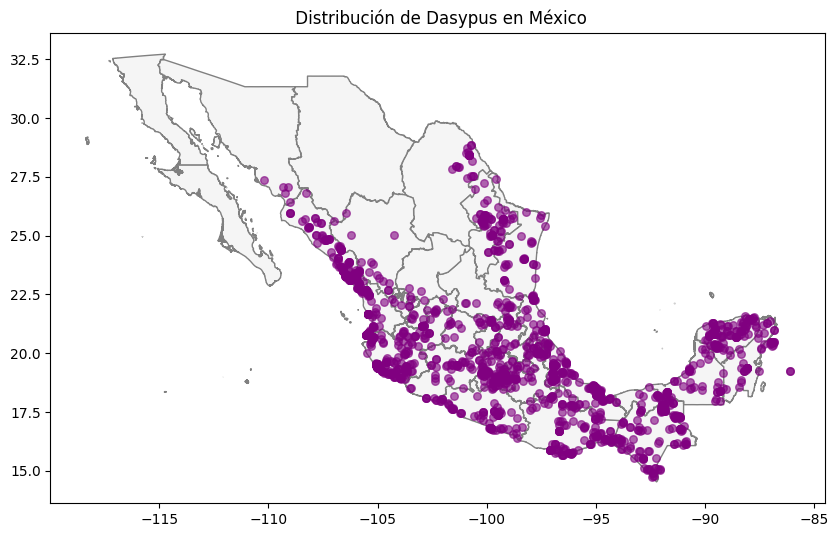

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
estados.plot(ax=ax, color='whitesmoke', edgecolor='gray')
gdf_armadillo_Mx.plot(ax=ax, color='purple', markersize=30, alpha=0.6)
plt.title(" Distribución de Dasypus en México")
plt.show()


## 🎨 7. Visualización 2 – Diferenciar por entrenador (usando `hue`)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129415 (\N{BAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


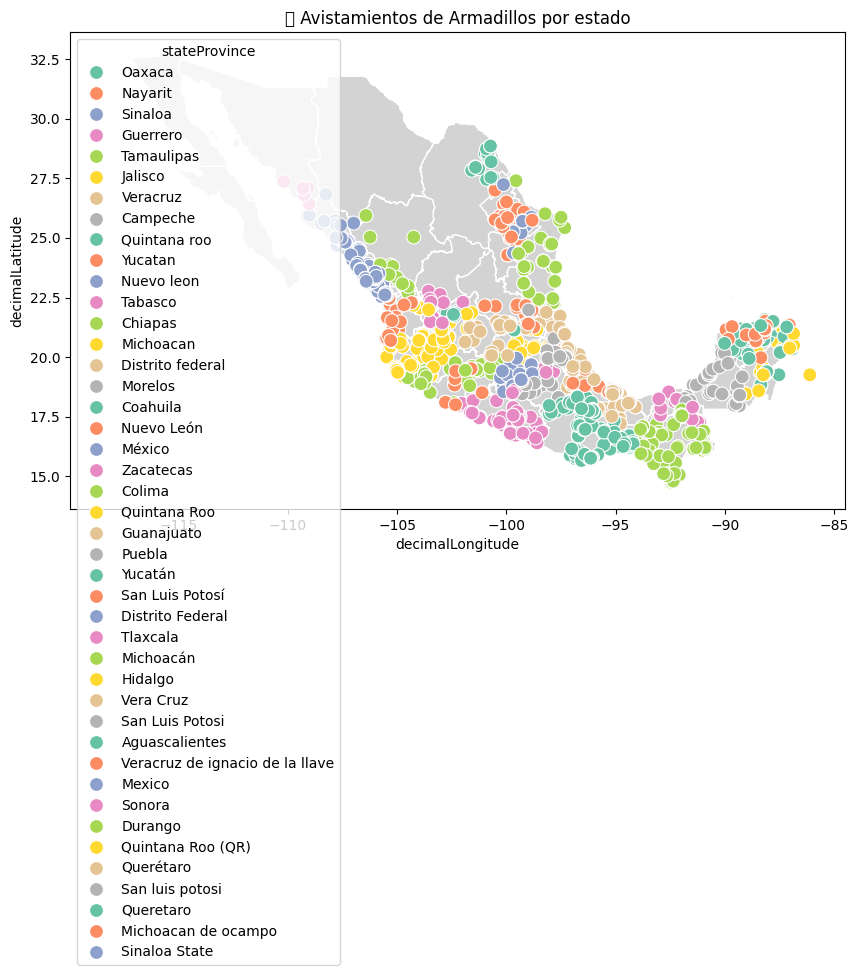

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
estados.plot(ax=ax, color='lightgray', edgecolor='white')
sns.scatterplot(
    data=gdf_armadillo_Mx,
    x='decimalLongitude', y='decimalLatitude',
    hue='stateProvince', palette='Set2', s=100
)
plt.title("🦇 Avistamientos de Armadillos por estado")
plt.show()


## 💜 8. Visualización 3 – Conteo de observaciones por entrenador


/tmp/ipython-input-2330282761.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=armadillo_Mx, x='stateProvince', palette='Purples')


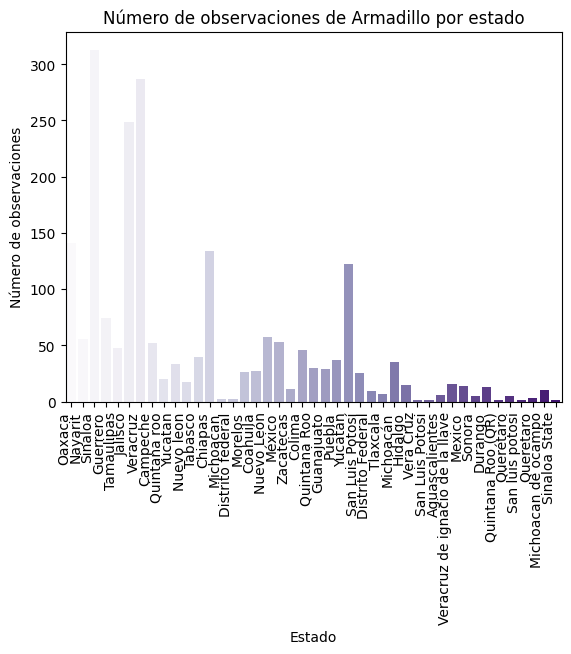

In [49]:
sns.countplot(data=armadillo_Mx, x='stateProvince', palette='Purples')
plt.title("Número de observaciones de Armadillo por estado")
plt.xlabel("Estado")
plt.ylabel("Número de observaciones")
plt.xticks(rotation=90, ha='right')
plt.show()


## 🕒 9. Visualización 4 – Evolución temporal de observaciones


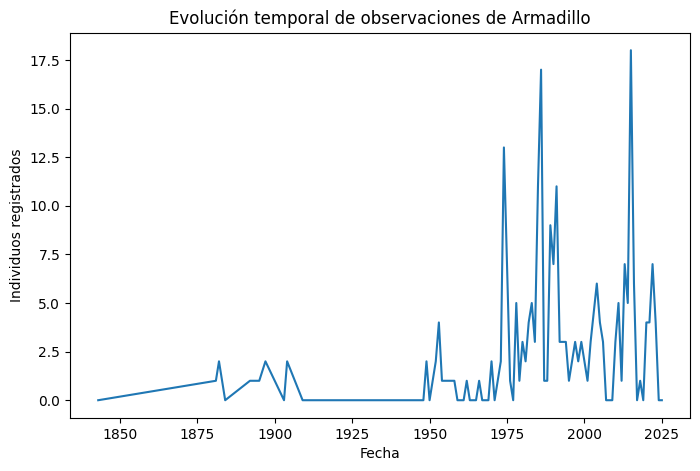

In [50]:
armadillo_Mx.groupby("year")["individualCount"].sum().plot(figsize=(8,5))
plt.title("Evolución temporal de observaciones de Armadillo")
plt.ylabel("Individuos registrados")
plt.xlabel("Fecha")
plt.show()


## 🗺️ 10. Visualización 5 – Mapa de calor (densidad)


In [51]:
from folium import Map
from folium.plugins import HeatMap

coords = gdf_armadillo_Mx[["decimalLatitude", "decimalLongitude"]].values.tolist()
m = Map(location=[23, -102], zoom_start=5)
HeatMap(coords, radius=10, cmap='coolwarm').add_to(m)
m


## 🧩 Ejercicios para el estudiante

1. Agrega otro Pokémon (Golbat) y compáralo con Zubat.
2. Cambia el color de los entrenadores según su frecuencia.
3. Crea un gráfico de barras agrupado por entrenador y mes.
4. Guarda el mapa en un archivo HTML.
5. Escribe una breve interpretación de los patrones espaciales.


# 🔥 Bloque 9B – Visualización SIG Avanzada: Operaciones y Análisis Ecológico 🌍

## 🎯 Objetivo
Aplicar técnicas avanzadas de análisis espacial (SIG) usando GeoPandas y visualizar métricas ecológicas como abundancia, riqueza y distribución.

## 🧰 Librerías
- geopandas
- pandas
- matplotlib
- seaborn
- shapely
- folium


## 🧭 1. Unión espacial entre puntos (Zubat) y municipios

Permite asociar cada observación con el municipio y estado al que pertenece.


In [52]:
gdf_armadillo_Mx.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue', 'geometry'],
      dtype='object')

In [59]:
# Unión espacial
gdf_armadillo_Mx = gpd.sjoin(gdf_armadillo_Mx, estados, how="left", predicate="within")

# Mostrar resultado parcial
gdf_armadillo_Mx[["scientificName", "year", "NOMGEO"]].head()


ValueError: 'index_right' cannot be a column name in the frames being joined

In [62]:
gdf_armadillo_Mx.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue', 'geometry', 'index_right', 'CVEGEO', 'CVE_ENT',
       'NOMGEO', 'CVE_CAP', 'NOM_CAP', 'COV_', 'COV_ID', 'AREA', 'PERIMETER

## 🧮 2. Cálculo de abundancia total por estado

La abundancia representa el número total de individuos observados en un área.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129415 (\N{BAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


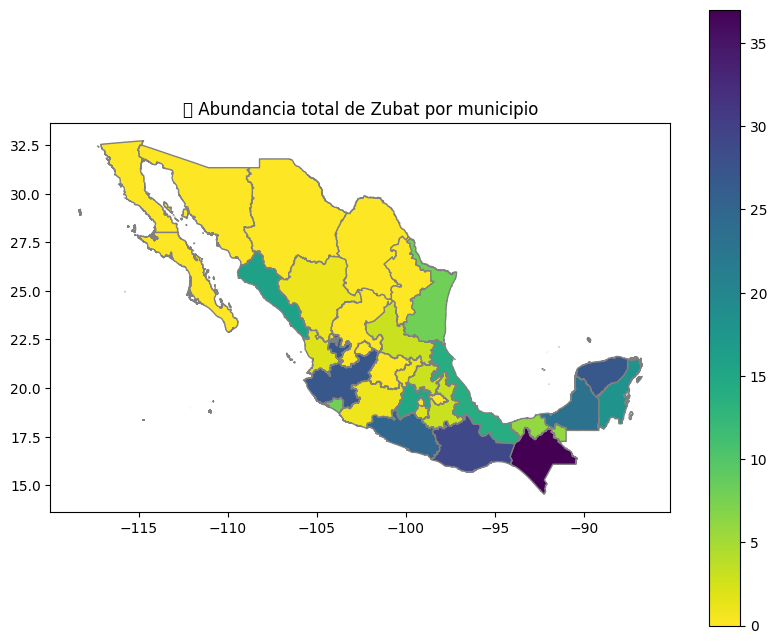

In [64]:
abund_estado = gdf_armadillo_Mx.groupby('NOMGEO')["individualCount"].sum().reset_index()
abund_estado.rename(columns={"individualCount": "abundancia"}, inplace=True)

est_abund = estados.merge(abund_estado, on='NOMGEO', how="left").fillna(0)

ax = est_abund.plot(column="abundancia", cmap="viridis_r", legend=True, figsize=(10,8), edgecolor="gray")
plt.title("🦇 Abundancia total de Zubat por municipio")
plt.show()


## 📊 3. Abundancia promedio por estado

Nos permite identificar qué estados registran más individuos en promedio.


/tmp/ipython-input-2209202052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=abund_estado, x="NOMGEO", y="individualCount", palette="plasma")


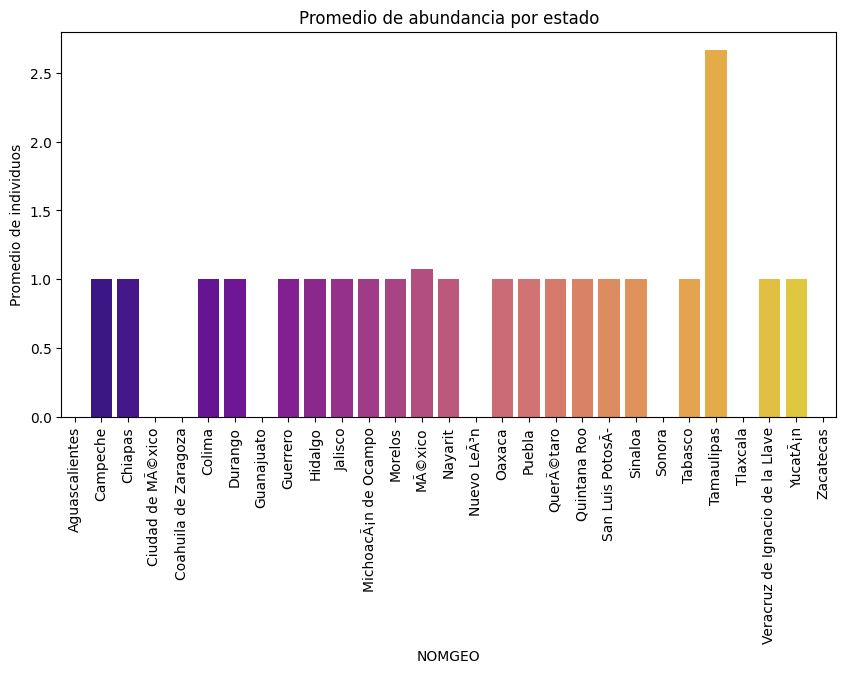

In [67]:
abund_estado = gdf_armadillo_Mx.groupby("NOMGEO")["individualCount"].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=abund_estado, x="NOMGEO", y="individualCount", palette="plasma")
plt.xticks(rotation=90)
plt.title("Promedio de abundancia por estado")
plt.ylabel("Promedio de individuos")
plt.show()


## 🗺️ 4. Selección y visualización de un estado específico

Ejemplo: filtrar solo **Sonora** para visualizar sus registros.


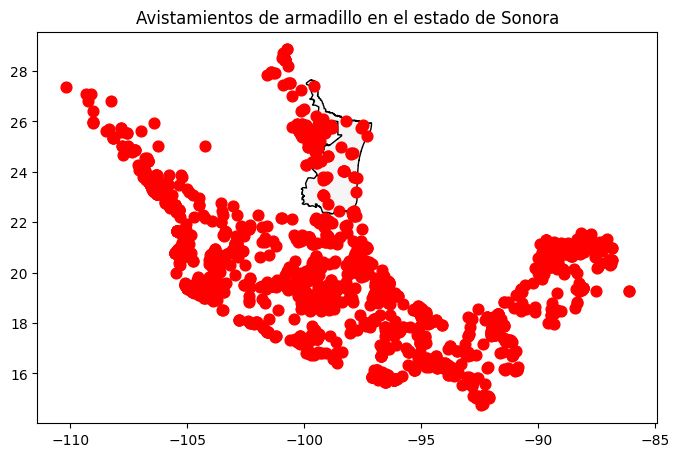

In [78]:
estado_sel = estados[estados["NOMGEO"] == "Tamaulipas"]
ax = estado_sel.plot(color="whitesmoke", edgecolor="black", figsize=(8,8))
gdf_armadillo_Mx.plot(ax=ax, color="red", markersize=60)
plt.title("Avistamientos de armadillo en el estado de Sonora")
plt.show()

## 🧩 5. Filtrado de municipios con alta abundancia (>10 individuos)


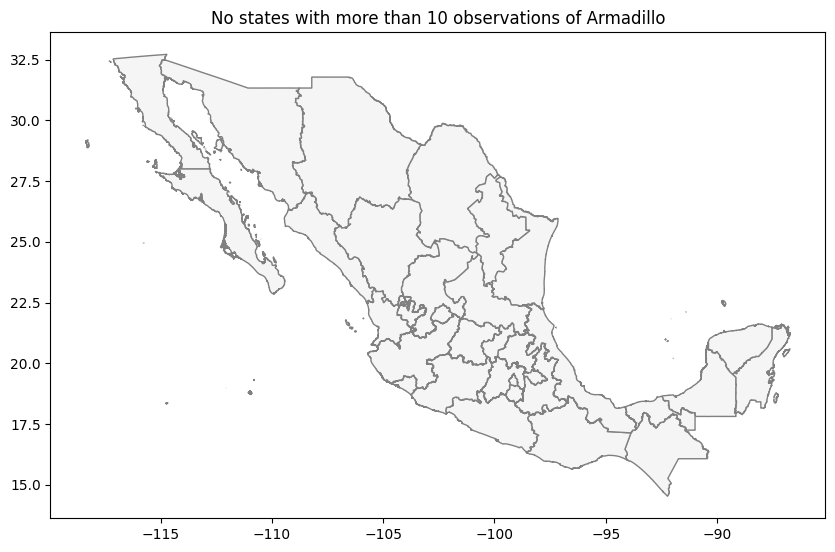

In [75]:
top_est = abund_estado[abund_estado["individualCount"] > 10]
estados_top = estados[estados["NOMGEO"].isin(top_est["NOMGEO"])]

ax = estados.plot(color="whitesmoke", edgecolor="gray", figsize=(10,8))

# Check if estados_top is empty before plotting
if not estados_top.empty:
  estados_top.plot(ax=ax, color="purple")
  plt.title("Estados con más de 10 observaciones de Armadillo")
else:
  plt.title("No states with more than 10 observations of Armadillo")

plt.show()

In [72]:
abund_estado.columns

Index(['NOMGEO', 'individualCount'], dtype='object')

## 🌳 6. Riqueza de especies (si se agregan otros Pokémon)
La riqueza indica cuántas especies distintas hay por municipio.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


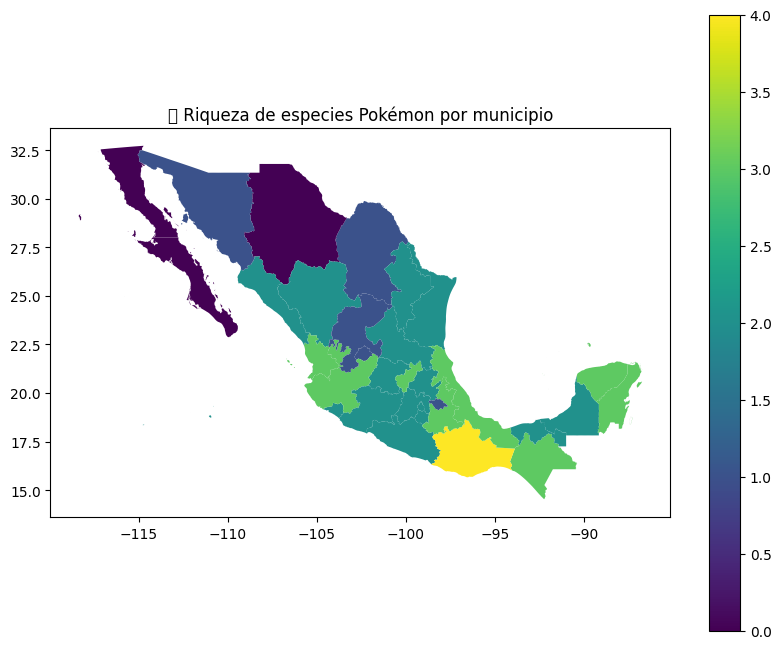

In [79]:
riqueza = gdf_armadillo_est.groupby("NOMGEO")["scientificName"].nunique().reset_index()
riqueza.rename(columns={"scientificName":"riqueza_especies"}, inplace=True)
mun_riqueza = estados.merge(riqueza, on="NOMGEO", how="left").fillna(0)

ax = mun_riqueza.plot(column="riqueza_especies", cmap="viridis", legend=True, figsize=(10,8))
plt.title("🌿 Riqueza de especies Pokémon por municipio")
plt.show()


## 🔥 7. Mapa de calor ponderado por abundancia
Los mapas de calor muestran las áreas con mayor densidad de observaciones.


In [81]:
from folium import Map
from folium.plugins import HeatMap

# Drop rows with NaN values in the relevant columns
heatmap_data = gdf_armadillo_Mx.dropna(subset=["decimalLatitude", "decimalLongitude", "individualCount"])

m = Map(location=[23, -102], zoom_start=5, tiles="CartoDB positron")
HeatMap(
    heatmap_data[["decimalLatitude", "decimalLongitude", "individualCount"]].values.tolist(),
    radius=15, blur=20, min_opacity=0.4
).add_to(m)
m

## 📍 8. Cálculo de centroides de distribución

Permite representar el punto medio de distribución de registros por estado.


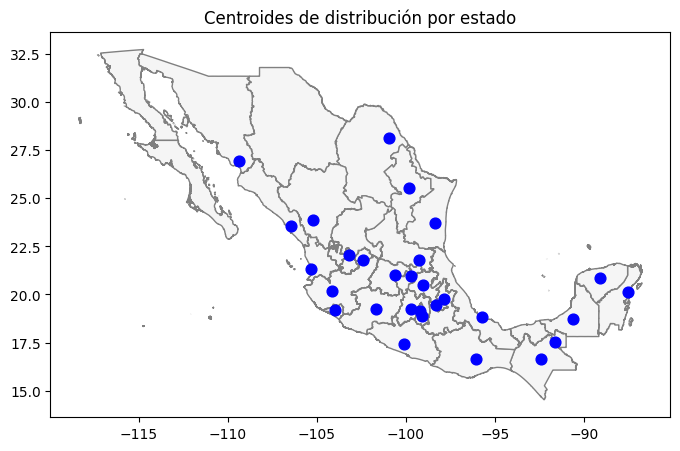

In [83]:
from shapely.ops import unary_union

centroides = gdf_armadillo_est.groupby("NOMGEO")["geometry"].apply(lambda x: unary_union(x).centroid)
centroides_gdf = gpd.GeoDataFrame(centroides, geometry="geometry", crs="EPSG:4326")

ax = estados.plot(color="whitesmoke", edgecolor="gray", figsize=(8,8))
centroides_gdf.plot(ax=ax, color="blue", markersize=60)
plt.title("Centroides de distribución por estado")
plt.show()

## 🧮 9. Zonas de influencia (Buffers de hábitat potencial)
Creamos áreas circulares alrededor de cada observación de Zubat para simular su rango de vuelo (~0.5° ≈ 55 km).


/tmp/ipython-input-1714265551.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer["geometry"] = buffer.buffer(0.5)


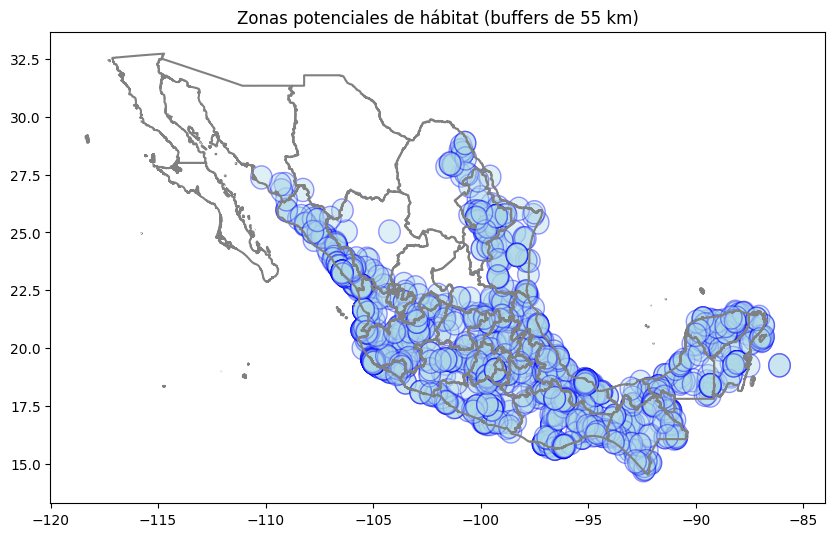

In [88]:
buffer = gdf_armadillo_est.copy()
buffer["geometry"] = buffer.buffer(0.5)

ax = estados.boundary.plot(color="gray", figsize=(10,8))
buffer.plot(ax=ax, color="lightblue", alpha=0.4, edgecolor="blue")
plt.title("Zonas potenciales de hábitat (buffers de 55 km)")
plt.show()


## 🌿 10. Mapa combinado: abundancia + buffers
Combina la información de abundancia municipal con zonas de influencia.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129415 (\N{BAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


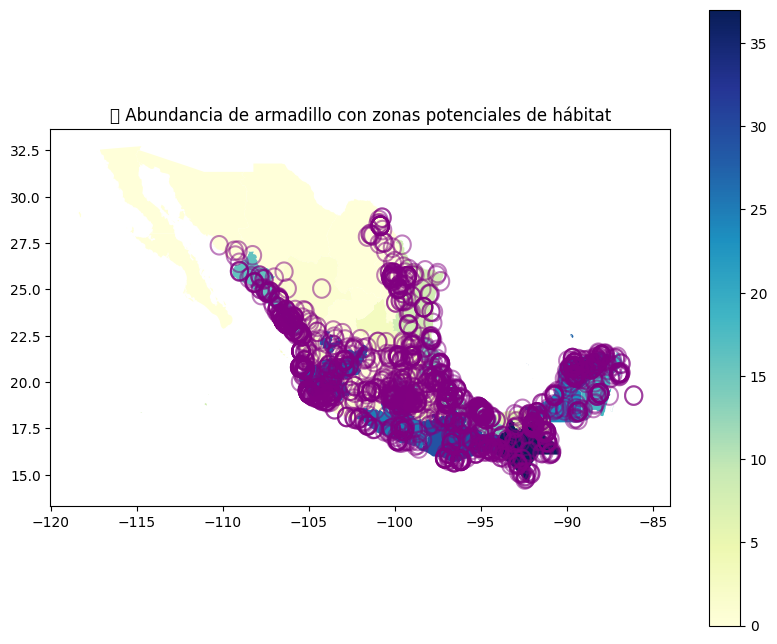

In [89]:
ax = est_abund.plot(column="abundancia", cmap="YlGnBu", legend=True, figsize=(10,8))
buffer.boundary.plot(ax=ax, color="purple", alpha=0.5)
plt.title("🦇 Abundancia de armadillo con zonas potenciales de hábitat")
plt.show()


## 🧪 Ejercicios prácticos para el estudiante

1. Selecciona otro estado (ej. Oaxaca) y repite el análisis de abundancia.  
2. Genera un mapa combinado de abundancia + riqueza.  
3. Calcula la abundancia promedio por entrenador.  
4. Crea un buffer más grande (1°) y compara la extensión del hábitat.  
5. Exporta el GeoDataFrame de abundancia a `zubat_abundancia.geojson`.  
6. Calcula los centroides de los municipios con más registros.  
7. Analiza si existe correlación entre `individualCount` y la latitud.  
8. Crea un mapa que use `alpha` para representar esfuerzo de muestreo.  
9. Usa un colormap distinto (ej. `'magma'`, `'coolwarm'`) y compara resultados.  
10. Escribe una breve conclusión ecológica de la distribución espacial de Zubat.


## 💬 Reflexión final

> ¿Qué patrones espaciales observas en la abundancia y riqueza?  
> ¿Qué estados concentran más registros?  
> ¿Cómo cambia el patrón si alteras la escala de análisis (municipal vs estatal)?  
>
> 🌿 *“Un mapa ecológico no solo representa el espacio, sino la historia de las interacciones que lo habitan.”*  
